<a href="https://colab.research.google.com/github/nadeeshafdo/google_colab/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
#Read in the data using pandas
df = pd.read_csv('/content/Network_Intrusion_Dataset.csv')
#Check a sample of the dataset
df.head()

,Port_Number,Received_Packets,Received_Bytes,Sent_Bytes,Sent_Packets,Port_Alive_Duration_Sec,Packets_Rx_Dropped,Packets_Tx_Dropped,Packets_Rx_Errors,Packets_Tx_Errors,...,Unknown_Load(Latest),Latest_Bytes_Counter,Is_Valid,Table_ID,Active_Flow_Entries,Packets_Looked_Up,Packets_Matched,Max_Size,Traffic_Type,Intrusion_Traffic_Type
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,1,0,6,992868,992744,-1,Normal,Normal
1,2,209,20671,6316631,274,96,0,0,0,0,...,6303353,183877,1,0,8,90551,90494,-1,Intrusion,PortScan
2,4,150,19774,6475473,3054,166,0,0,0,0,...,6439888,502,1,0,6,7516,7418,-1,Intrusion,TCP-SYN
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,1,0,8,664849,664714,-1,Normal,Normal
4,3,990,104058,88896,778,792,0,0,0,0,...,7152,715,1,0,5,4328,4201,-1,Intrusion,Blackhole


In [3]:
list(df.columns)

['Port_Number',
 'Received_Packets',
 'Received_Bytes',
 'Sent_Bytes',
 'Sent_Packets',
 'Port_Alive_Duration_Sec',
 'Packets_Rx_Dropped',
 'Packets_Tx_Dropped',
 'Packets_Rx_Errors',
 'Packets_Tx_Errors',
 'Delta_Received_Packets',
 'Delta_Received_Bytes',
 'Delta_Sent_Bytes',
 'Delta_Sent_Packets',
 'Delta_Port_Alive_Duration_Sec',
 'Delta_Packets_Rx_Dropped',
 'Delta_Packets_Tx_Dropped',
 'Delta_Packets_Rx_Errors',
 'Delta_Packets_Tx_Errors',
 'Connection_Point',
 'Total_Load(Rate)',
 'Total_Load(Latest)',
 'Unknown_Load(Rate)',
 'Unknown_Load(Latest)',
 'Latest_Bytes_Counter',
 'Is_Valid',
 'Table_ID',
 'Active_Flow_Entries',
 'Packets_Looked_Up',
 'Packets_Matched',
 'Max_Size',
 'Traffic_Type',
 'Intrusion_Traffic_Type']

In [4]:
#check the number of rows and columns in the dataset
df.shape

(4998, 33)

In [5]:
import plotly.express as px
#Construct a bar graph for Traffic_Type target variable
Traffic_Type_fig = px.bar(df, x = 'Traffic_Type', title = "Traffic Types")

#Construct a bar graph for Intrusion_Traffic_Type target variable
Intrusion_Traffic_Type_fig = px.bar(df, x ='Intrusion_Traffic_Type', title =" Attacks Types")

#Construct a bivariate bar graph for both target variable
Intrusion_Types_Per_Traffic_fig = px.bar(df,x ='Traffic_Type', color = 'Intrusion_Traffic_Type', title = "Attack Types In Intrusion Traffic", color_discrete_sequence = px.colors.qualitative.Vivid)

#Remove the bar outline by setting the marker.line.width attribute to 0
Traffic_Type_fig.update_traces(dict(marker_line_width=0))
Intrusion_Traffic_Type_fig.update_traces(dict(marker_line_width=0))
Intrusion_Types_Per_Traffic_fig.update_traces(dict(marker_line_width=0))

#Plot all constructed bar graphs
Traffic_Type_fig.show()
Intrusion_Traffic_Type_fig.show()
Intrusion_Types_Per_Traffic_fig.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Port_Number                    4998 non-null   int64 
 1   Received_Packets               4998 non-null   int64 
 2   Received_Bytes                 4998 non-null   int64 
 3   Sent_Bytes                     4998 non-null   int64 
 4   Sent_Packets                   4998 non-null   int64 
 5   Port_Alive_Duration_Sec        4998 non-null   int64 
 6   Packets_Rx_Dropped             4998 non-null   int64 
 7   Packets_Tx_Dropped             4998 non-null   int64 
 8   Packets_Rx_Errors              4998 non-null   int64 
 9   Packets_Tx_Errors              4998 non-null   int64 
 10  Delta_Received_Packets         4998 non-null   int64 
 11  Delta_Received_Bytes           4998 non-null   int64 
 12  Delta_Sent_Bytes               4998 non-null   int64 
 13  Del

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Port_Number,4998.0,2.235094e+00,1.062464e+00,1.0,1.00,2.0,3.00,4.0
Received_Packets,4998.0,8.393248e+04,1.223941e+05,10.0,836.50,3595.5,178957.75,352772.0
Received_Bytes,4998.0,4.721429e+07,4.951127e+07,856.0,8643970.00,25593619.0,75727934.00,271591638.0
Sent_Bytes,4998.0,4.743702e+07,4.894604e+07,5775.0,6548716.25,29771955.0,76097629.00,239242994.0
Sent_Packets,4998.0,1.484074e+05,1.497138e+05,42.0,1042.25,134206.5,287707.50,421598.0
Port_Alive_Duration_Sec,4998.0,1.377490e+03,9.844243e+02,26.0,241.00,1385.0,2237.00,3317.0
Packets_Rx_Dropped,4998.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Packets_Tx_Dropped,4998.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Packets_Rx_Errors,4998.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Packets_Tx_Errors,4998.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0


In [8]:
# To expand e scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Port_Number,4998.00,2.24,1.06,1.00,1.00,2.00,3.00,4.00
Received_Packets,4998.00,83932.48,122394.12,10.00,836.50,3595.50,178957.75,352772.00
Received_Bytes,4998.00,47214291.87,49511274.80,856.00,8643970.00,25593619.00,75727934.00,271591638.00
Sent_Bytes,4998.00,47437016.12,48946041.43,5775.00,6548716.25,29771955.00,76097629.00,239242994.00
Sent_Packets,4998.00,148407.44,149713.80,42.00,1042.25,134206.50,287707.50,421598.00
Port_Alive_Duration_Sec,4998.00,1377.49,984.42,26.00,241.00,1385.00,2237.00,3317.00
Packets_Rx_Dropped,4998.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets_Tx_Dropped,4998.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets_Rx_Errors,4998.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets_Tx_Errors,4998.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
df = df.drop(columns=df.loc[:, 'Packets_Rx_Dropped':'Packets_Tx_Errors'].columns)
df = df.drop(columns=df.loc[:, 'Delta_Packets_Rx_Dropped':'Delta_Packets_Tx_Errors'].columns)
df = df.drop(['Is_Valid', 'Table_ID', 'Max_Size'], axis=1)
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Port_Number,4998.00,NaN,NaN,NaN,2.24,1.06,1.00,1.00,2.00,3.00,4.00
Received_Packets,4998.00,NaN,NaN,NaN,83932.48,122394.12,10.00,836.50,3595.50,178957.75,352772.00
Received_Bytes,4998.00,NaN,NaN,NaN,47214291.87,49511274.80,856.00,8643970.00,25593619.00,75727934.00,271591638.00
Sent_Bytes,4998.00,NaN,NaN,NaN,47437016.12,48946041.43,5775.00,6548716.25,29771955.00,76097629.00,239242994.00
Sent_Packets,4998.00,NaN,NaN,NaN,148407.44,149713.80,42.00,1042.25,134206.50,287707.50,421598.00
Port_Alive_Duration_Sec,4998.00,NaN,NaN,NaN,1377.49,984.42,26.00,241.00,1385.00,2237.00,3317.00
Delta_Received_Packets,4998.00,NaN,NaN,NaN,104.55,784.47,0.00,0.00,4.00,4.00,15659.00
Delta_Received_Bytes,4998.00,NaN,NaN,NaN,333088.12,1180140.16,0.00,0.00,556.00,560.00,6302708.00
Delta_Sent_Bytes,4998.00,NaN,NaN,NaN,311865.50,1154417.43,278.00,280.00,556.00,560.00,6303182.00
Delta_Sent_Packets,4998.00,NaN,NaN,NaN,95.54,765.86,2.00,2.00,4.00,4.00,15592.00


In [11]:
df.isna().sum()/len(df)*100

,0
Port_Number,0.00
Received_Packets,0.00
Received_Bytes,0.00
Sent_Bytes,0.00
Sent_Packets,0.00
Port_Alive_Duration_Sec,0.00
Delta_Received_Packets,0.00
Delta_Received_Bytes,0.00
Delta_Sent_Bytes,0.00
Delta_Sent_Packets,0.00


In [12]:
df.to_csv(r'/content/Prepared_Network_Intrusion_Dataset.csv', index = False)

In [13]:
df_prepared = pd.read_csv('/content/Prepared_Network_Intrusion_Dataset.csv')

In [14]:
#create a dataframe with all training data except the target column
X = df_prepared.drop(columns=['Traffic_Type','Intrusion_Traffic_Type'])
# here, we select one target variable to model, Traffic_Type
y = df_prepared['Traffic_Type']
#check that the list of input variables
list(X)

['Port_Number',
 'Received_Packets',
 'Received_Bytes',
 'Sent_Bytes',
 'Sent_Packets',
 'Port_Alive_Duration_Sec',
 'Delta_Received_Packets',
 'Delta_Received_Bytes',
 'Delta_Sent_Bytes',
 'Delta_Sent_Packets',
 'Delta_Port_Alive_Duration_Sec',
 'Connection_Point',
 'Total_Load(Rate)',
 'Total_Load(Latest)',
 'Unknown_Load(Rate)',
 'Unknown_Load(Latest)',
 'Latest_Bytes_Counter',
 'Active_Flow_Entries',
 'Packets_Looked_Up',
 'Packets_Matched']

In [15]:
#check that the list of target variable
y.head()

,Traffic_Type
0,Normal
1,Intrusion
2,Intrusion
3,Normal
4,Intrusion


In [17]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (3998, 20)
X_test Instances (1000, 20)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [19]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
2409,Normal,Normal
2612,Normal,Normal
4016,Intrusion,Intrusion
79,Intrusion,Intrusion
456,Normal,Normal
...,...,...
2256,Intrusion,Intrusion
3707,Intrusion,Intrusion
2043,Intrusion,Intrusion
4827,Normal,Normal


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Intrusion       0.88      0.82      0.85       472
      Normal       0.85      0.90      0.87       528

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



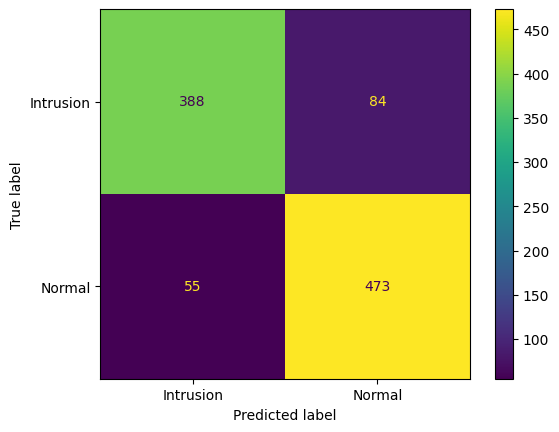

In [21]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix

#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

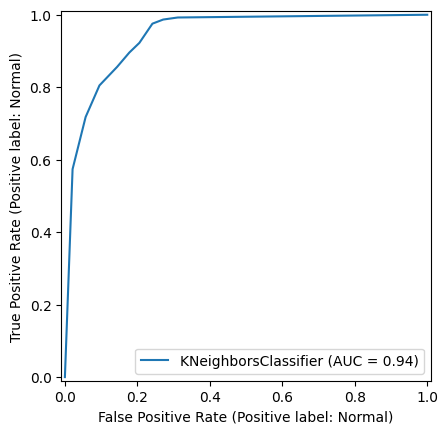

In [22]:
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Text(0, 0.5, 'Mean Error')

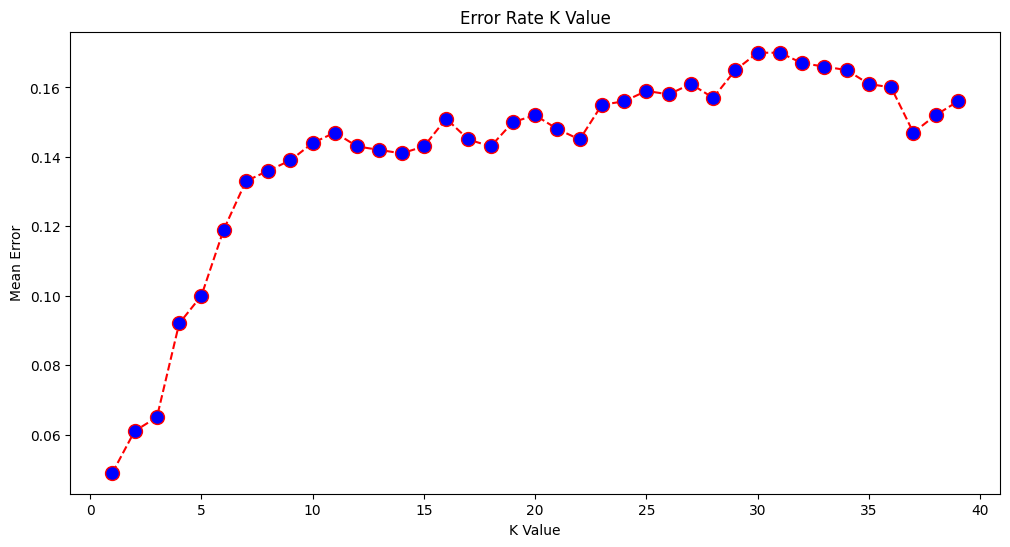

In [23]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
#Perform predictions on the test data
y_pred=knn1.predict(X_test)

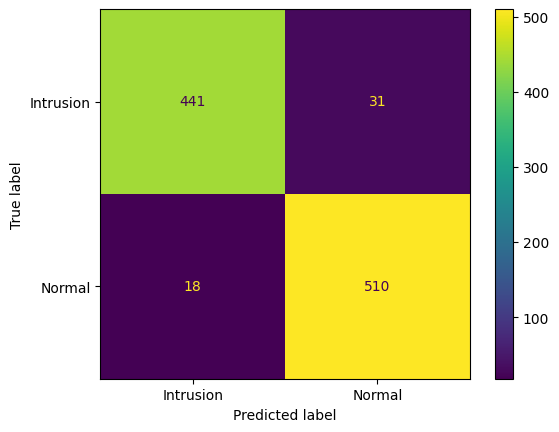

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Intrusion       0.96      0.93      0.95       472
      Normal       0.94      0.97      0.95       528

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



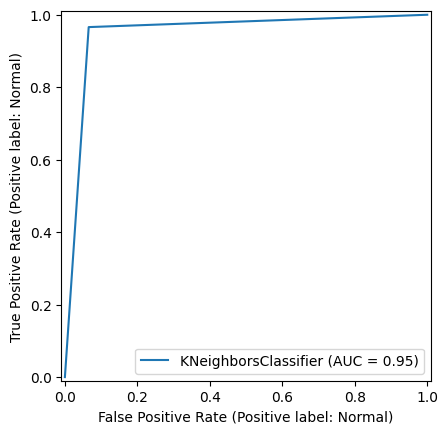

In [28]:
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn1, X_test, y_test)

In [29]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [30]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

              precision    recall  f1-score   support

   Intrusion       0.98      0.98      0.98       472
      Normal       0.98      0.98      0.98       528

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



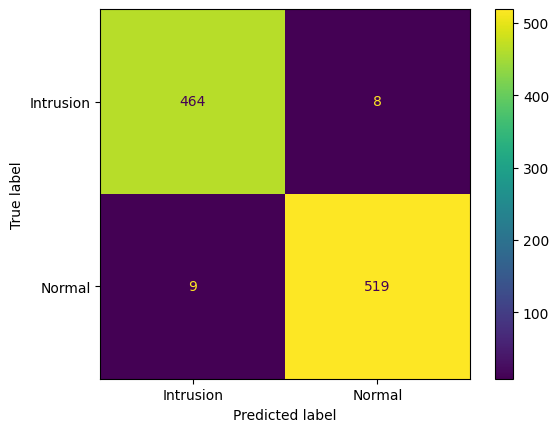

In [31]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred))

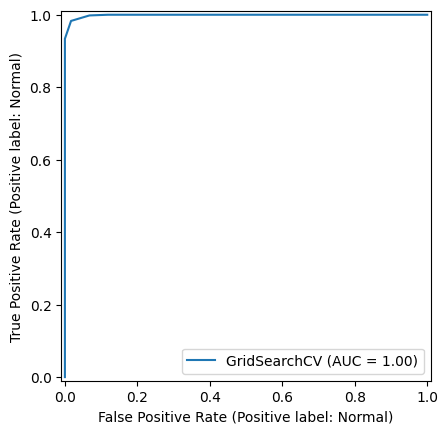

In [32]:
from sklearn.metrics import RocCurveDisplay
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px

In [34]:
dataset = pd.read_csv('/content/BC_Data.csv')

In [35]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
fig = px.scatter(dataset, x="radius_mean",y="texture_mean", color = "diagnosis", width=800, height=800)
fig.show()

In [38]:
dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

In [39]:
X = dataset.drop(["diagnosis"], axis = 1)
y = dataset['diagnosis']

In [40]:
# Perform Minimum - Maximum Normalization:
X1 = (X - np.min(X)) / (np.max(X) - np.min(X))